# Identifying Textiles Using Machine Learning and Spectraphotometry 
 
 by: Mitch Shiles 
### Introduction
Modern textiles represent a large source of pollution. The textile & fashion industry(especially fast fashion) contributes to environmental degradation in nearly all facets of its current existence. The textile industry contributes to climate change through energy used by industrial looms, along with production and preparation of both synthetic and natural fibers. Water resources are heavily relied upon for both growing and dying of fibers.  Garments and apparel are more frequently being designed to obsolese faster. This is conducted through a shorter fashion/marketing cycle and by creating clothing with a shorter life expectancy, resulting in greater consumption by consumers.*citation needed

Even after the point of purchase, textiles continue to cause problems, in particular loose woven plastic synthetics, which shed plastic lint with every wash. The lint is rarely collected by waste water treatment plants and often ends up down stream in lakes, estuaries, seas, and oceans. This lint contributes to a significant portion of ocean microplastics.  In fast fashion, textile blends of polyester, elastic, nylon, acrylic, and cotton are used regularly. Separating and recycling these materials is nearly impossible and is certainly not economical with current technologies.  Additionally, large amounts of used clothing that is not resold in thrift stores is either dumped in landfills or is sent to developing countries. Clothing sent abroad can disrupt small developing economies by displacing small scale and traditional producers of garments 


    Reducing the impact of this industry will likely require a multi faceted approach involving regulation of textiles to require recyclable and recycled content. 
Identifying textile materials and dyes in a rapid manner could assist in the trade, recycling, and regulating of textiles. If an objective way to sort textiles by color could be made available, fibers recycled with like colors, could potentially skip bleaching and dying by utilizing the dyes already present in the material.





Spectroscopy is the study of interactions between matter and the electromagnetic spectrum, spectrometric tools  are used in almost every scientific field and applied in a multitude of industries. Spectroscopy, is a useful tool in material and chemical analysis and has been used by scientists since the early 1800s. In many ways, human vision works similarly, using three wavelengths of light to determine the color of a material. However, spectroscopy can go much further, measuring a greater (often continuous) number of wavelengths that can range well outside of the visible light spectrum.  The spectra a material reflects and absorbs depends on its chemical composition. Specific elements and molecules will reflect and absorb unique wavelengths.  The types of chemical bonds that form molecules in a material also reflect and absorb different wavelengths depending on their structure. So each unique chemical/material has a unique spectra. There is a lot of potential between spectroscopy and identifying materials in the waste stream. 



In addition to being a useful tool for analyzing materials, it is also nondestructive in that measurements can be taken without damaging the original material or sample. Spectroscopy, specifically NIR spectroscopy, is a method that has been widely implemented in various recycling and material regulation industries. In fact, infrared spectroscopy has already been used to sort clothing and a multitude of other materials from the waste stream. Spectroscopy has also be used to determine the authenticity of foods such as chocolate and olive oil. 


For this project clothing apparal had its reflectivity recorded at 18 different wavelengths ranging from near ultraviolet to near infrared along with material data and observed color machine learning is then applied to the recorded data to predict the material and color of the garments. 



This combined with other methods might help reign in what is increasingly becoming a problem for the industry and the planet. 

****reformate below 
textile problem 
https://www.sciencemag.org/news/2011/10/laundry-lint-pollutes-worlds-oceans

https://www.researchgate.net/figure/Capability-of-different-textile-materials-to-absorb-visible-and-near-IR-parts-of-spectrum_fig2_329895960

what is spectroscopy 

devices and data collection





In [1]:
#Show PJM Regions
#https://www.researchgate.net/publication/329895960_Carbon_Containing_Material_in_Non-Woven_Fabrics_for_Thermoinsulation_of_Winter_Apparel
from IPython.display import Image
Image(url= 'https://www.researchgate.net/publication/329895960/figure/fig2/AS:707446616104960@1545679825006/Capability-of-different-textile-materials-to-absorb-visible-and-near-IR-parts-of-spectrum.png')        

### Materials and Methods for Data Collection 
The data was collected using a device created for measurement of spectral data. 
The device consisted of :
- Arduino uno 
- Sparkfun Triad spectroscopy sensor 
- Sparkfun openlog SDcard recorder
- LCD display
- rotary encoder
- T9 incandescent lightbulb and socket
- aluminium enclosure 
- plywood
- 6" of square 1" aluminium tube
- Auxilary phone charger

The code for the recording device can be found at:
https://github.com/rmshiles/Textiles-Spectroscopy-and-and-Supervised-Learning

Garments were then held against the recording device and their reflectance was then measured with then spectroscopy sensor. Each recording included a manual input of the material according to the tag, and an approximate observed color category. Each reading was recorded on the SD card using the 'Openlog' in the format of a comma separated value file. Originally the intent of this project was to collect data from 2nd hand stores and clothing retailers. However due to the lock down another strategy was deployed to obtain a large enough data set. Each garment was recorded at least twice for every color combination that appeared in the clothing. This may lead to issues with overfitting since highly similar recordings may end up in both the training and test set, a problem that I hope to correct in the future.  Below is a diagram showing the wavelengths that the spectroscopy sensor records at. 

In [2]:
#Show PJM Regions
from IPython.display import Image
Image(url= "https://cdn.sparkfun.com/assets/learn_tutorials/8/3/0/Spectral_Detection_Frequencies.jpg")

notes
conduct more data explration and feature engineering such as including PCA

X conduct smote to increase the counts of other materials 

conduct grid search to optomize parameters 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


In [3]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
import warnings 

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('/Users/robertshiles/CSV_files/Final Textile.csv',encoding= 'latin1')
df.head()

Material Color  Opacity  A=410nm  B=435nm  C=460nm  D=485nm  E=510nm  F=535nm  G=560nm  H=585nm  I=645nm  J=705nm  K=900nm  L=940nm  R=610nm  S=680nm  T=730nm  U=760nm  V=810nm   W860nm
0      Cot   Blu      NaN  3192.79  1866.49  3257.94  2069.56  1838.89  1579.59   902.35  1595.24   653.96  1052.72  2672.11  3305.34  1254.25  1185.24  3084.72  3712.59  4529.42  4804.92
1      Cot   Blu      NaN  3160.60  1844.24  3216.13  2055.37  1818.19  1552.49   882.48  1562.26   634.47  1021.23  2633.01  3268.61  1200.41  1127.68  3011.79  3633.51  4468.01  4704.30
2      Cot   Blu      NaN  3223.03  1850.73  3199.77  2071.34  1807.84  1544.15   885.79  1579.33   653.31  1022.23  2601.94  3286.97  1246.23  1144.27  3082.15  3630.99  4439.06  4589.65
3      Cot   Wht      NaN  3296.19  2063.88  3482.47  2224.80  1974.94  1712.32  1059.64  1897.92  1045.11  1394.79  2629.80  3269.45  2297.74  2275.85  3826.94  4062.57  4656.63  4741.74
4      Cot   Wht      NaN  3879.54  2222.36  3712.46  2360.52  2086.59  1802.67  1121.73  2030.24  1219.56  1558.86  2808.69  3495.64  2645.95  2988.95  4185.61  4381.41  5026.84  5057.62

for this project the target variabels will be Material and color 

In [5]:
#create a dictionary to convert color data to color codes for matplotlib
Color_dict = {'Blu':'b',
               'Wht':'w',
               'Grn':'g',
               'Brn':'brown',
               'Red':'r',
               'Pur':'m',
               'Blk':'k',
               'Yel':'y',
               'Gry':'gray',
               'Tan':'tan',
               'Org':'orange'}

#create a column to store the color codes in for ploting 
df['colorcode'] = df.apply(lambda row: Color_dict[row.Color], axis = 1) 


In [6]:
#reorganize the columns so that they are in ascending order

df = df[['Material','Color','colorcode',
        'A=410nm', 'B=435nm','C=460nm',
        'D=485nm','E=510nm','F=535nm',
        'G=560nm','H=585nm','R=610nm',
        'I=645nm','S=680nm','J=705nm',
        'T=730nm','U=760nm','V=810nm',
        'W860nm','K=900nm','L=940nm']]
df = df.rename(columns={"W860nm": "W=860nm"})
df.head()

Material Color colorcode  A=410nm  B=435nm  C=460nm  D=485nm  E=510nm  F=535nm  G=560nm  H=585nm  R=610nm  I=645nm  S=680nm  J=705nm  T=730nm  U=760nm  V=810nm  W=860nm  K=900nm  L=940nm
0      Cot   Blu         b  3192.79  1866.49  3257.94  2069.56  1838.89  1579.59   902.35  1595.24  1254.25   653.96  1185.24  1052.72  3084.72  3712.59  4529.42  4804.92  2672.11  3305.34
1      Cot   Blu         b  3160.60  1844.24  3216.13  2055.37  1818.19  1552.49   882.48  1562.26  1200.41   634.47  1127.68  1021.23  3011.79  3633.51  4468.01  4704.30  2633.01  3268.61
2      Cot   Blu         b  3223.03  1850.73  3199.77  2071.34  1807.84  1544.15   885.79  1579.33  1246.23   653.31  1144.27  1022.23  3082.15  3630.99  4439.06  4589.65  2601.94  3286.97
3      Cot   Wht         w  3296.19  2063.88  3482.47  2224.80  1974.94  1712.32  1059.64  1897.92  2297.74  1045.11  2275.85  1394.79  3826.94  4062.57  4656.63  4741.74  2629.80  3269.45
4      Cot   Wht         w  3879.54  2222.36  3712.46  2360.52  2086.59  1802.67  1121.73  2030.24  2645.95  1219.56  2988.95  1558.86  4185.61  4381.41  5026.84  5057.62  2808.69  3495.64

Color     Blk  Blu  Brn  Grn  Gry  Org  Pur  Red  Tan  Wht  Yel
Material                                                       
Cot        95  259   58   92  128   30   54   37   48  142   31
Nyln       66   56    0    0   16   13   18   26    0   44   26
Poly       53   38    0   56   51   15    0   53    0   40    0
Wol        10   28   13   31    9   15    0   30    8   11   16

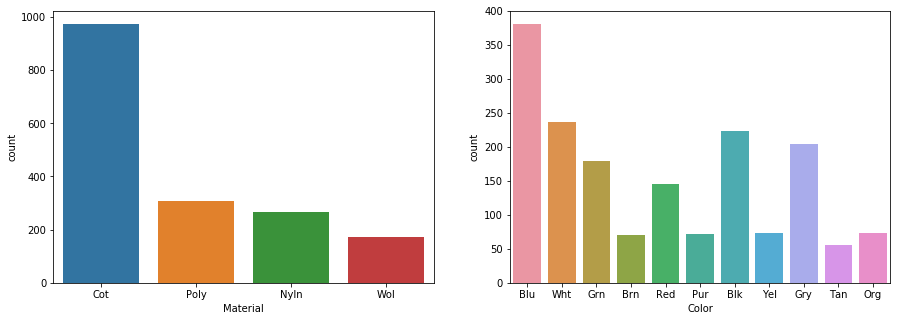

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Material',data = df)
plt.subplot(1,2,2)
sns.countplot(x = 'Color',data = df)
pd.crosstab(df['Material'], df['Color'], dropna=False)


## Class Imbalance
Right off the bat when exploring the categorical values for material type and approximate percieved color, we can see that there is a class imbalance. The imbalance is particularly bad for wool, nylon, and polyester along with colors such as tan, yellow, brown, purple, and orange. In addition colors are missing for certain materials for example the color green for nylon. This was due to limitations in materials that could be sampled and will be resolved when more data is collected. For now the material imbalance will be corrected with synthetic oversampling techniques that will be incorporated into the training dataset. The colors should be assumed to be only observed approximations of color. The simplified labeling technique was used for expediency in taking samples. It does not account for the wide variation in color i.e. neon fabric, dark navy, olive drab, or burnt orange. 


In [8]:
# create standardized versions of the columns
from sklearn.preprocessing import StandardScaler

#np.where(X.values >= np.finfo(np.float64).max)
X = df.drop(columns=['Color','Material','colorcode'])
# Normalize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

cont_vars =  ['A=410nm',
              'B=435nm',
              'C=460nm',
               'D=485nm',
               'E=510nm',
               'F=535nm',
               'G=560nm',
               'H=585nm',
               'R=610nm',
               'I=645nm',
               'S=680nm',
               'J=705nm',
               'T=730nm',
               'U=760nm',
               'V=810nm',
               'W=860nm',
               'K=900nm',
               'L=940nm']
for i, var in enumerate( cont_vars):
    df["{}_std".format(var)] = X_std[:, i]

df.head()

Material Color colorcode  A=410nm  B=435nm  C=460nm  D=485nm  E=510nm  F=535nm  G=560nm  H=585nm  R=610nm  I=645nm  S=680nm  J=705nm  T=730nm  U=760nm  V=810nm  W=860nm  K=900nm  L=940nm  A=410nm_std  B=435nm_std  C=460nm_std  D=485nm_std  E=510nm_std  F=535nm_std  G=560nm_std  H=585nm_std  R=610nm_std  I=645nm_std  S=680nm_std  J=705nm_std  T=730nm_std  U=760nm_std  V=810nm_std  W=860nm_std  K=900nm_std  L=940nm_std
0      Cot   Blu         b  3192.79  1866.49  3257.94  2069.56  1838.89  1579.59   902.35  1595.24  1254.25   653.96  1185.24  1052.72  3084.72  3712.59  4529.42  4804.92  2672.11  3305.34     0.675674     1.133067     1.182924     1.144312     1.374811     1.454544     1.126850     0.666799    -0.036441    -0.123047    -0.649744    -0.135188     0.201874     0.521319     0.659886     0.902484     0.747025     0.646362
1      Cot   Blu         b  3160.60  1844.24  3216.13  2055.37  1818.19  1552.49   882.48  1562.26  1200.41   634.47  1127.68  1021.23  3011.79  3633.51  4468.01  4704.30  2633.01  3268.61     0.617934     1.068459     1.104968     1.106691     1.313089     1.360644     1.028842     0.573463    -0.105456    -0.182807    -0.720525    -0.240345     0.121835     0.427972     0.594549     0.787538     0.665816     0.587825
2      Cot   Blu         b  3223.03  1850.73  3199.77  2071.34  1807.84  1544.15   885.79  1579.33  1246.23   653.31  1144.27  1022.23  3082.15  3630.99  4439.06  4589.65  2601.94  3286.97     0.729915     1.087304     1.074465     1.149031     1.282228     1.331746     1.045168     0.621772    -0.046721    -0.125040    -0.700124    -0.237006     0.199054     0.424997     0.563748     0.656565     0.601284     0.617085
3      Cot   Wht         w  3296.19  2063.88  3482.47  2224.80  1974.94  1712.32  1059.64  1897.92  2297.74  1045.11  2275.85  1394.79  3826.94  4062.57  4656.63  4741.74  2629.80  3269.45     0.861144     1.706230     1.601563     1.555885     1.780474     1.914446     1.902675     1.523415     1.301168     1.076302     0.691353     1.007115     1.016451     0.934440     0.795229     0.830309     0.659149     0.589164
4      Cot   Wht         w  3879.54  2222.36  3712.46  2360.52  2086.59  1802.67  1121.73  2030.24  2645.95  1219.56  2988.95  1558.86  4185.61  4381.41  5026.84  5057.62  2808.69  3495.64     1.907507     2.166409     2.030383     1.915707     2.113384     2.227504     2.208931     1.897895     1.747525     1.611203     1.568235     1.555008     1.410086     1.310803     1.189109     1.191163     1.030698     0.949645

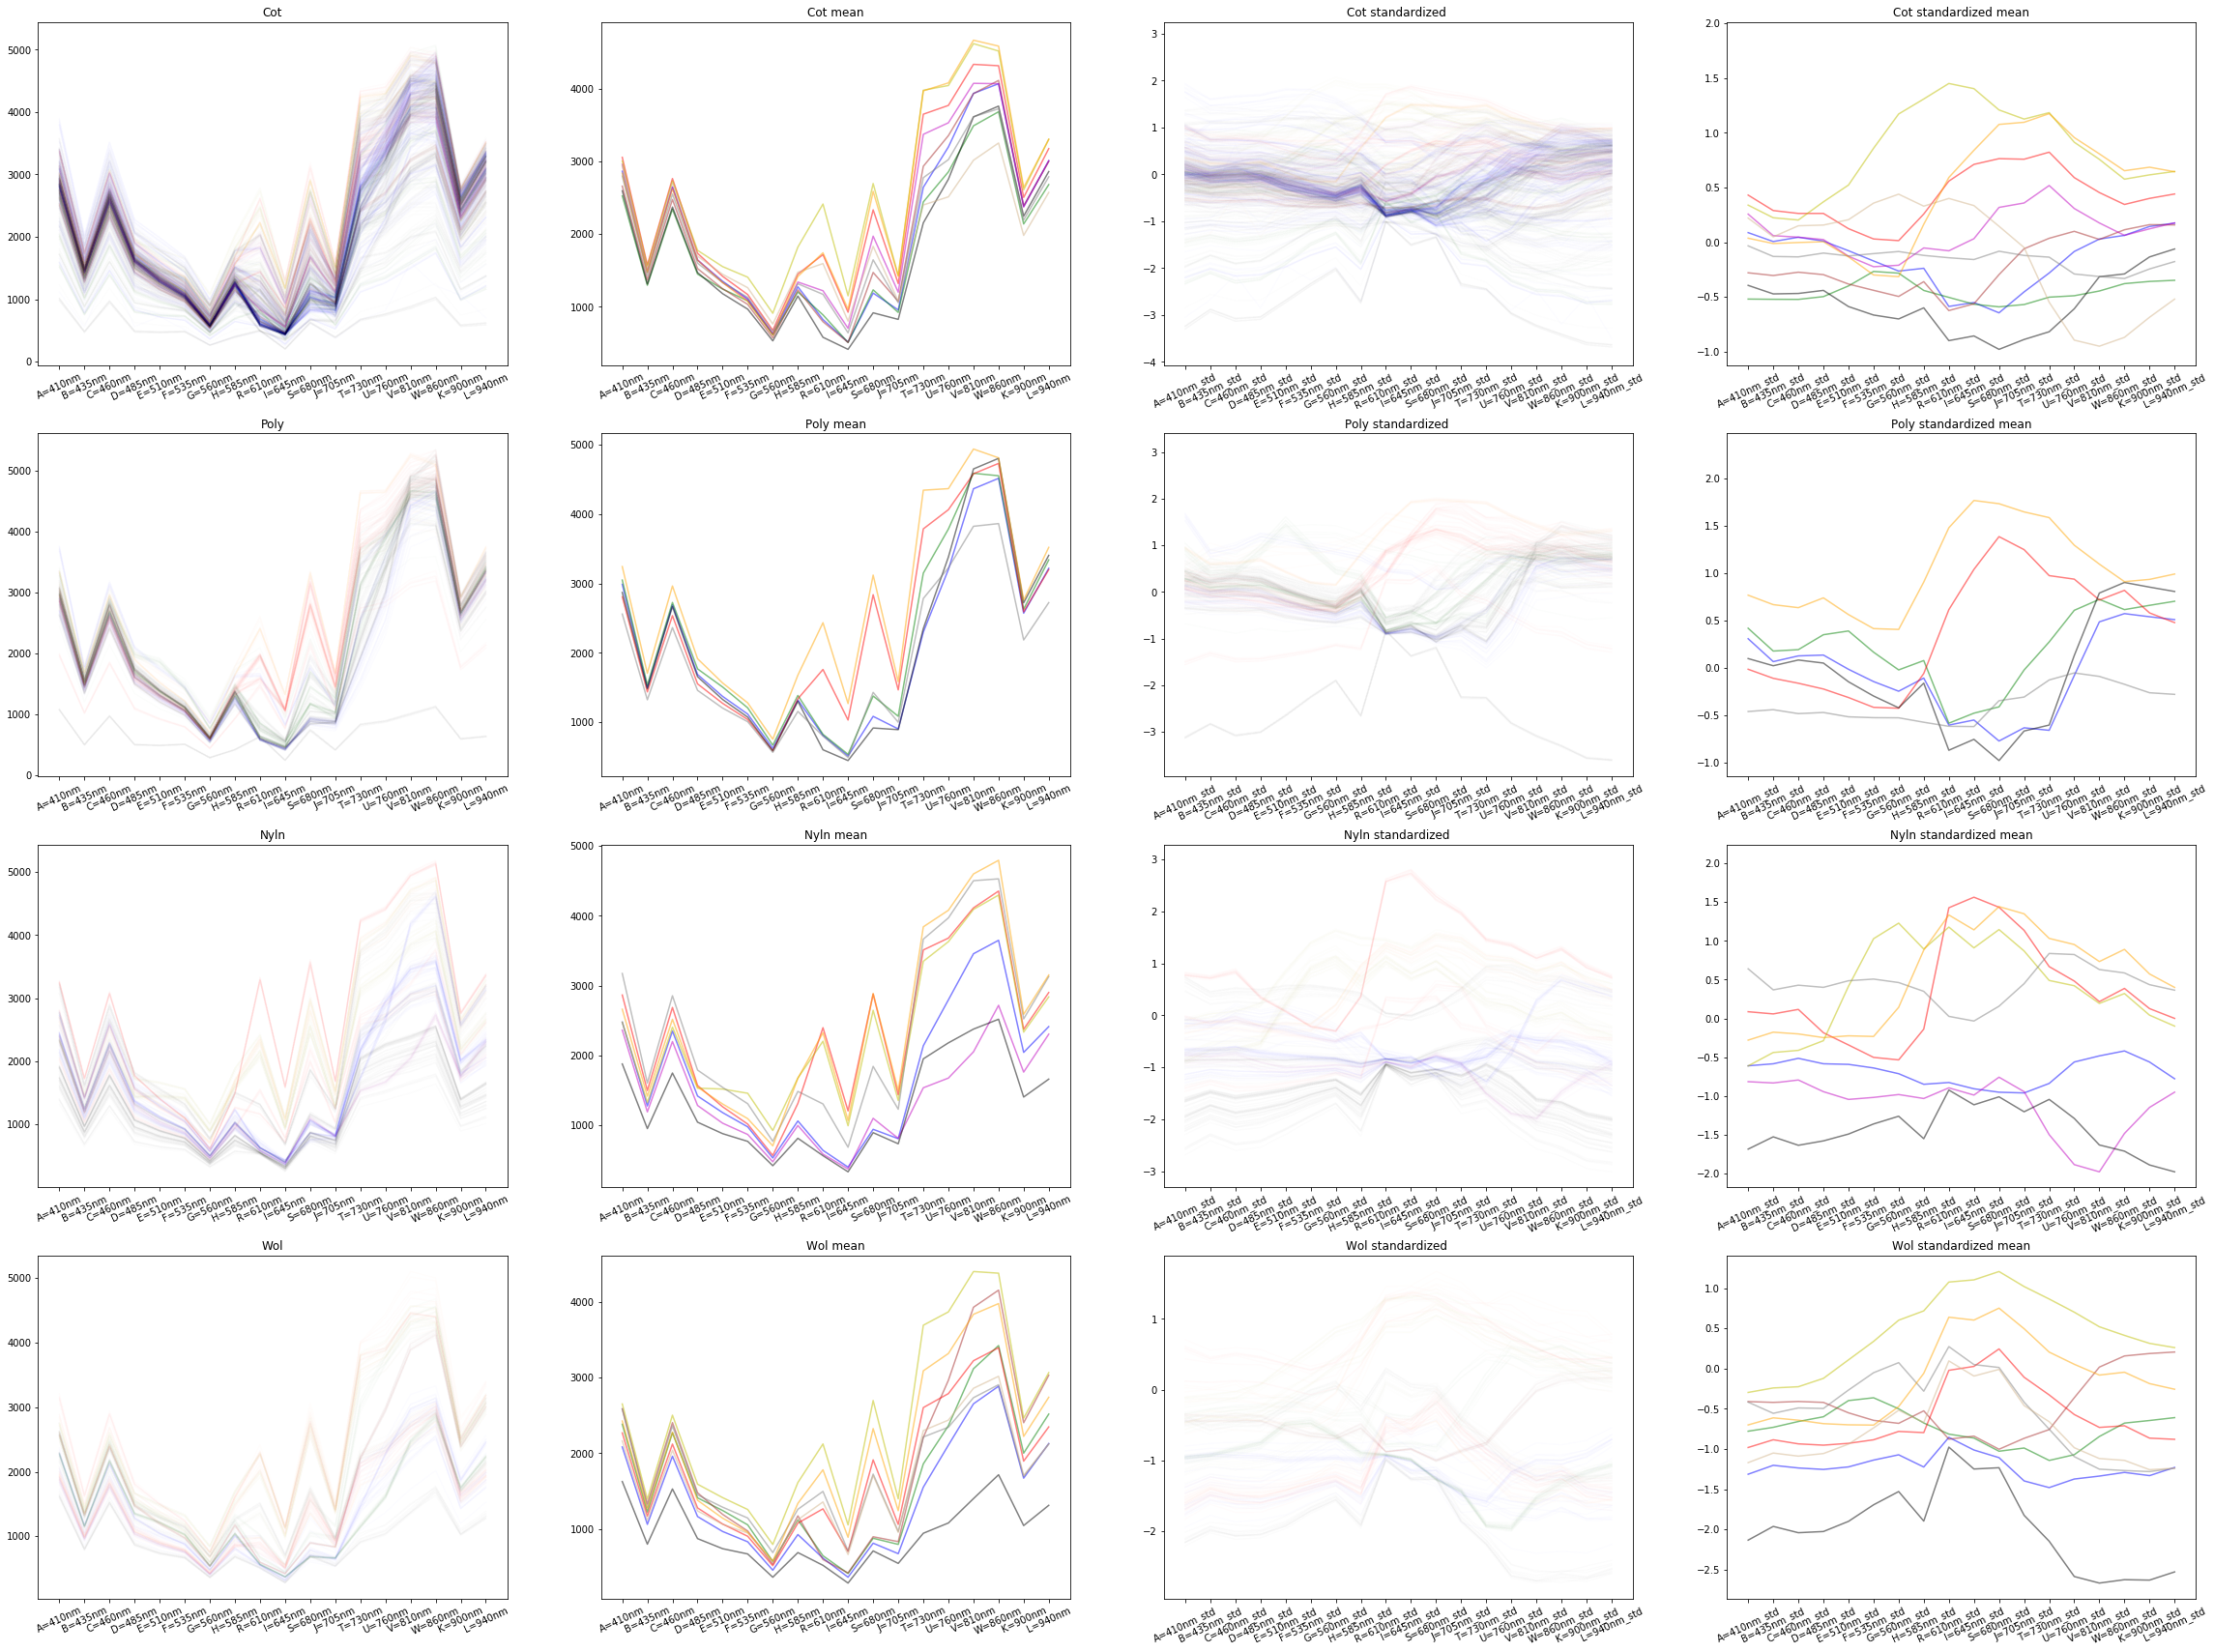

['Cot', 'Poly', 'Nyln', 'Wol']


In [9]:
# create plots of the spectra both normalized and as raw readings 
Materials=[]
Materials = df['Material'].unique().tolist()
colors = []
colors = df['colorcode'].unique().tolist()


plt.figure(figsize=(40,30))
p=0
n=0

   
for i,Material in enumerate (Materials,1):
    p=i*4
    for hue in colors:
        plt.subplot(len(Materials),4,p-3)
        Textile = pd.DataFrame()
        
        Textile  = df.loc[(df['colorcode'] == hue) & (df['Material'] == Material),['A=410nm',
                       'B=435nm',
                       'C=460nm',
                       'D=485nm',
                       'E=510nm',
                       'F=535nm',
                       'G=560nm',
                       'H=585nm',
                       'R=610nm',
                       'I=645nm',
                       'S=680nm',
                       'J=705nm',
                       'T=730nm',
                       'U=760nm',
                       'V=810nm',
                       'W=860nm',
                       'K=900nm',
                       'L=940nm']]
        
        if len(Textile) > 0:
            PivotTextile = Textile.T
            #print(Textile.head())
            #PivotTextile.plot()
            plt.plot(PivotTextile, color = hue, alpha = 0.01)
            plt.title(Material)
            #plt.ylim(0,6000)
            plt.xticks(rotation=25)

        else:
            None
            
        plt.subplot(len(Materials),4,p-2)
        Textile_mean = df.loc[(df['colorcode'] == hue) & (df['Material'] == Material),['A=410nm',
                       'B=435nm','C=460nm',
                       'D=485nm','E=510nm',
                       'F=535nm','G=560nm',
                       'H=585nm','R=610nm',
                       'I=645nm','S=680nm',
                       'J=705nm','T=730nm',
                       'U=760nm','V=810nm',
                       'W=860nm','K=900nm',
                       'L=940nm']].mean()
        PivotTextile_mean = Textile_mean.T
        plt.plot(PivotTextile_mean, color = hue, alpha = 0.5)
        plt.title('{} mean'.format(Material))
        #plt.ylim(0,6000)
        plt.xticks(rotation=25)

        plt.subplot(len(Materials),4,p-1)
        Textile_std = df.loc[ (df['colorcode'] == hue) & (df['Material'] == Material), ['A=410nm_std',
                     'B=435nm_std','C=460nm_std',
                     'D=485nm_std','E=510nm_std', 
                     'F=535nm_std','G=560nm_std',
                     'H=585nm_std','R=610nm_std',
                     'I=645nm_std', 'S=680nm_std',
                     'J=705nm_std', 'T=730nm_std',
                     'U=760nm_std','V=810nm_std',
                     'W=860nm_std', 'K=900nm_std', 
                     'L=940nm_std']]
        if len(Textile_std) > 0:
            PivotTextile_std = Textile_std.T
            #print(Textile.head())
            #PivotTextile.plot()
            plt.plot(PivotTextile_std, color = hue, alpha = 0.01)
            plt.title('{} standardized '.format(Material))
            #plt.ylim(0,6000)
            plt.xticks(rotation=25)
        else:
            None
            
        plt.subplot(len(Materials),4,p)
        Textile_std_mean = df.loc[ (df['colorcode'] == hue) & (df['Material'] == Material), ['A=410nm_std',
                     'B=435nm_std','C=460nm_std',
                     'D=485nm_std','E=510nm_std', 
                     'F=535nm_std','G=560nm_std',
                     'H=585nm_std','R=610nm_std',
                     'I=645nm_std', 'S=680nm_std',
                     'J=705nm_std', 'T=730nm_std',
                     'U=760nm_std','V=810nm_std',
                     'W=860nm_std', 'K=900nm_std', 
                     'L=940nm_std']].mean()
        PivotTextile_std_mean = Textile_std_mean.T
        plt.plot(PivotTextile_std_mean, color = hue, alpha = 0.5)
        plt.title('{} standardized mean'.format(Material))
        plt.xticks(rotation=25)

        #plt.ylim(0,6000)

        
plt.show()

print(Materials)



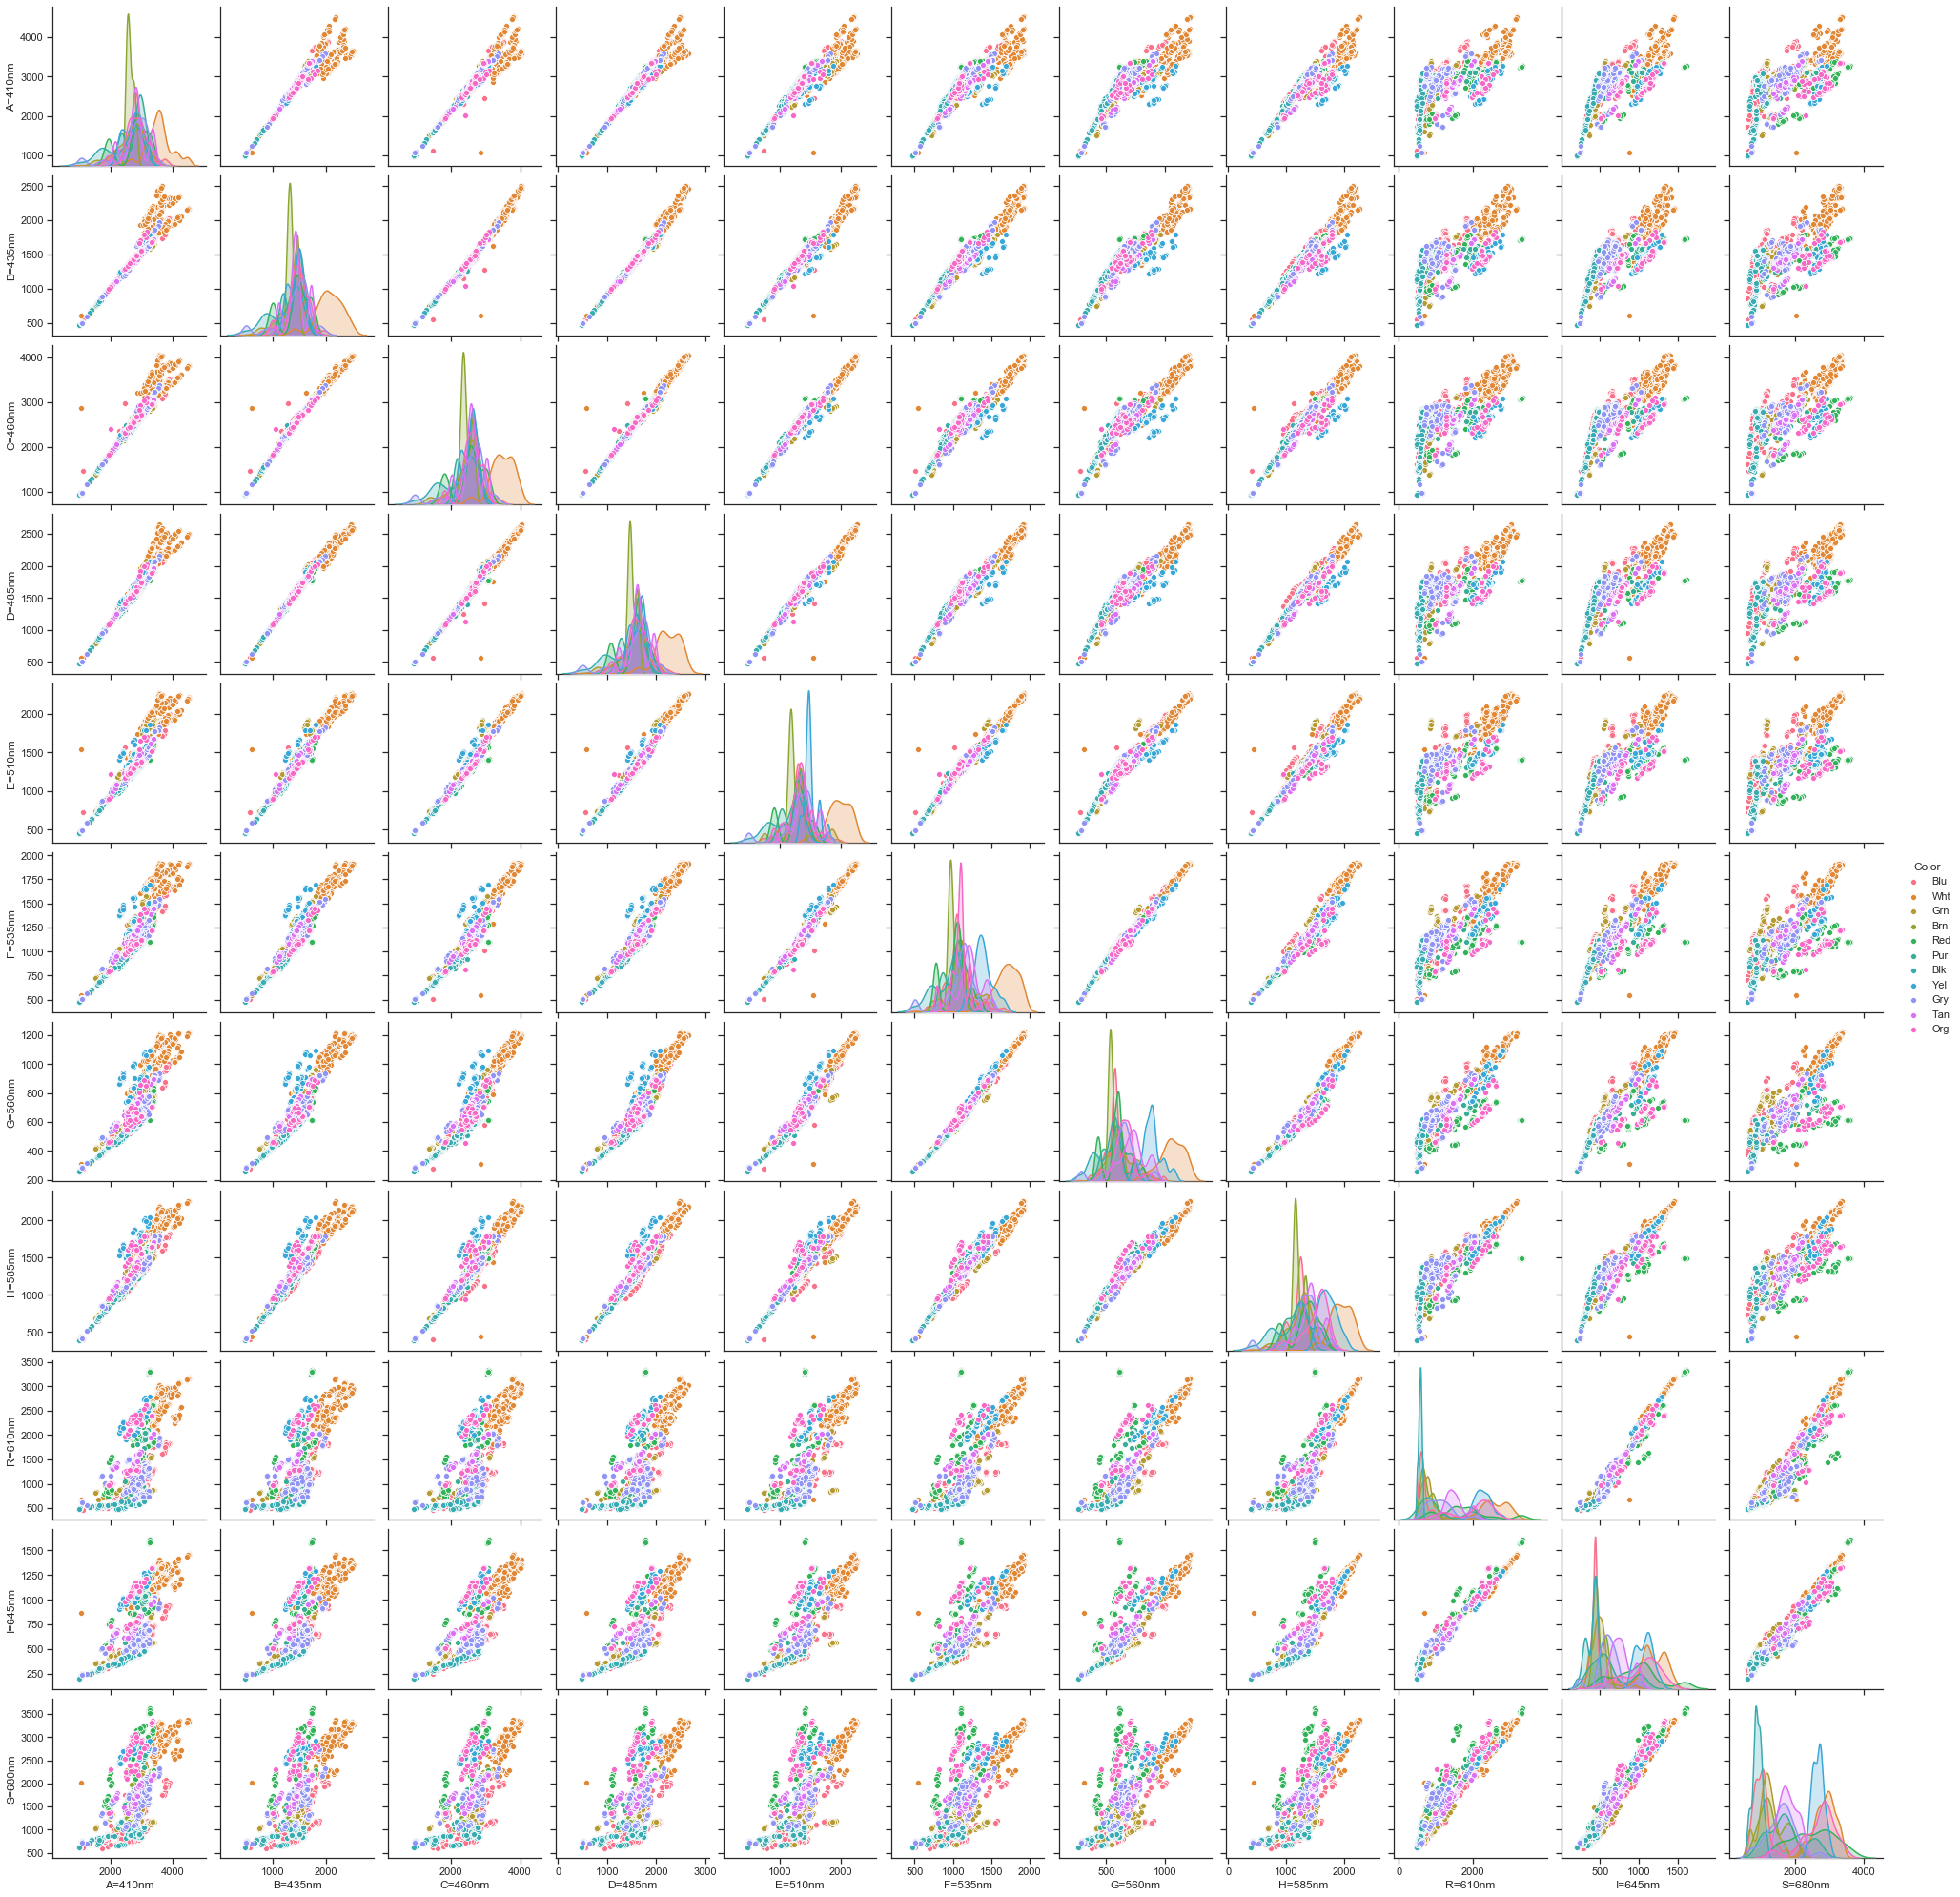

In [10]:
sns.set(style="ticks")
data = df[['Color',
           'A=410nm',
           'B=435nm',
           'C=460nm',
           'D=485nm',
           'E=510nm',
           'F=535nm',
           'G=560nm',
           'H=585nm',
           'R=610nm', 
           'I=645nm', 
           'S=680nm']]




sns.pairplot(data, hue='Color')


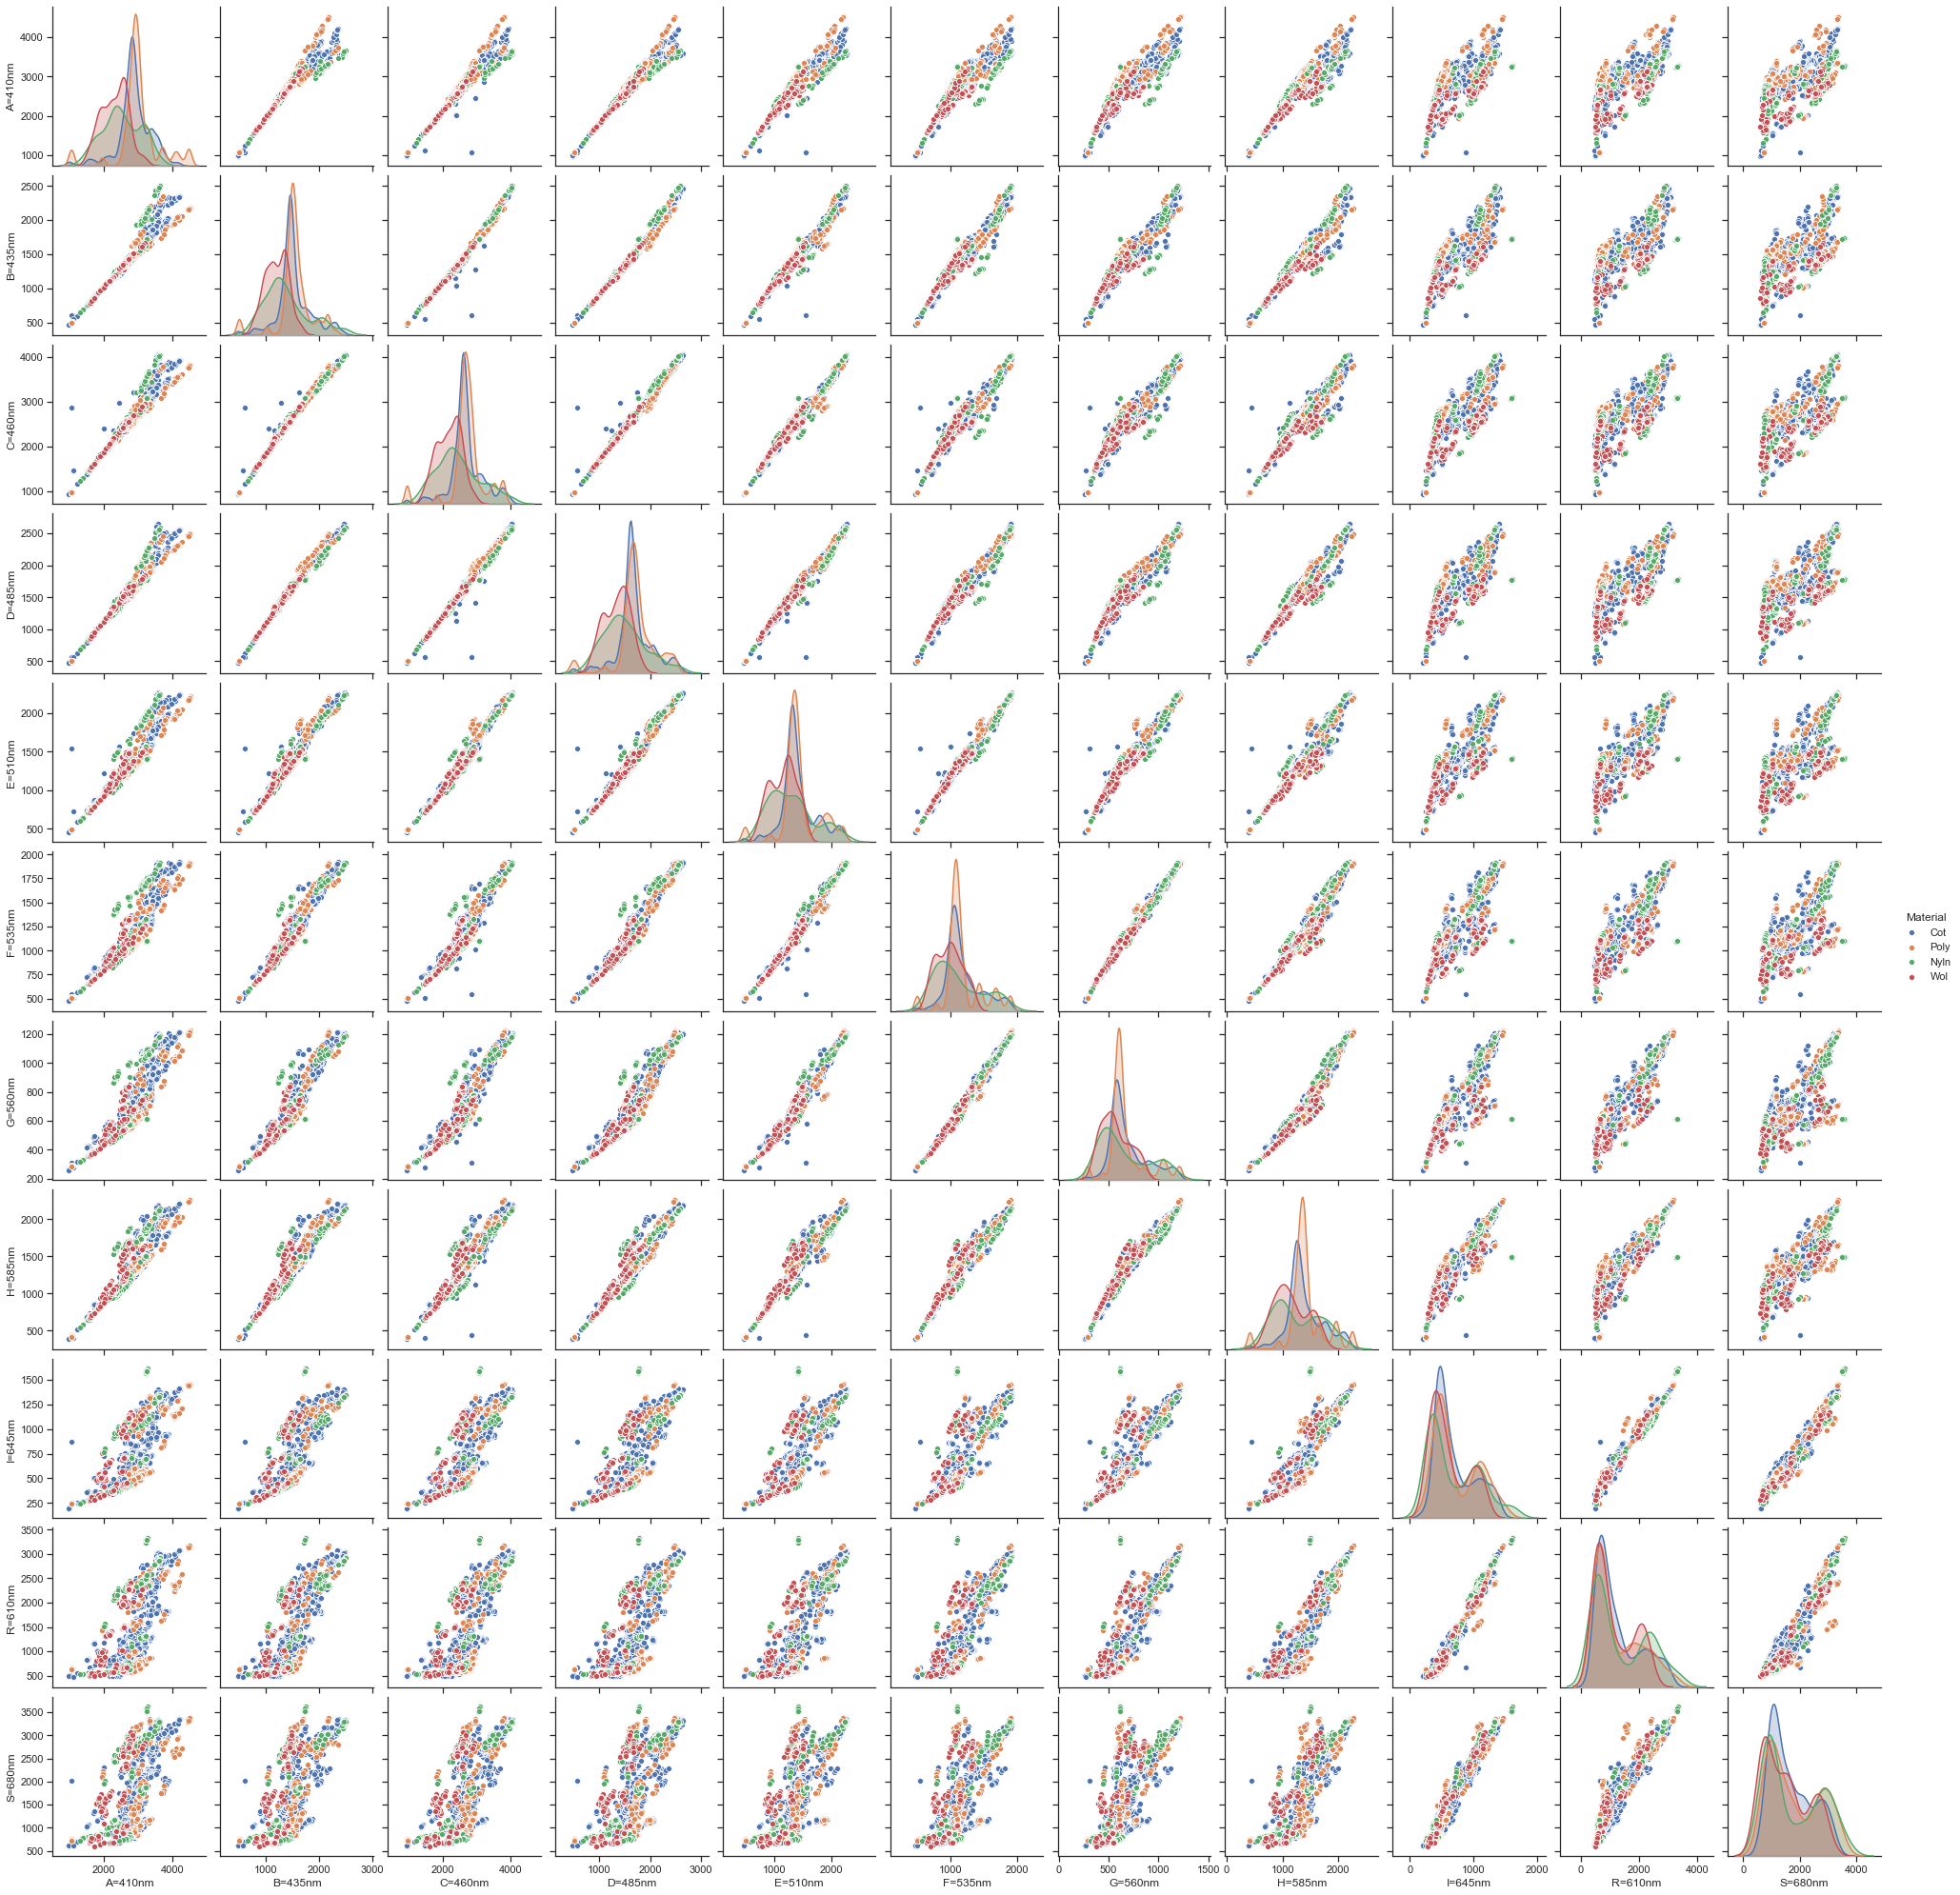

In [11]:
sns.set(style="ticks")
data = df[['Material',
           'A=410nm',
           'B=435nm',
           'C=460nm',
           'D=485nm',
           'E=510nm',
           'F=535nm',
           'G=560nm',
           'H=585nm',
           'I=645nm',
           'R=610nm', 
           'S=680nm']]




sns.pairplot(data, hue='Material')


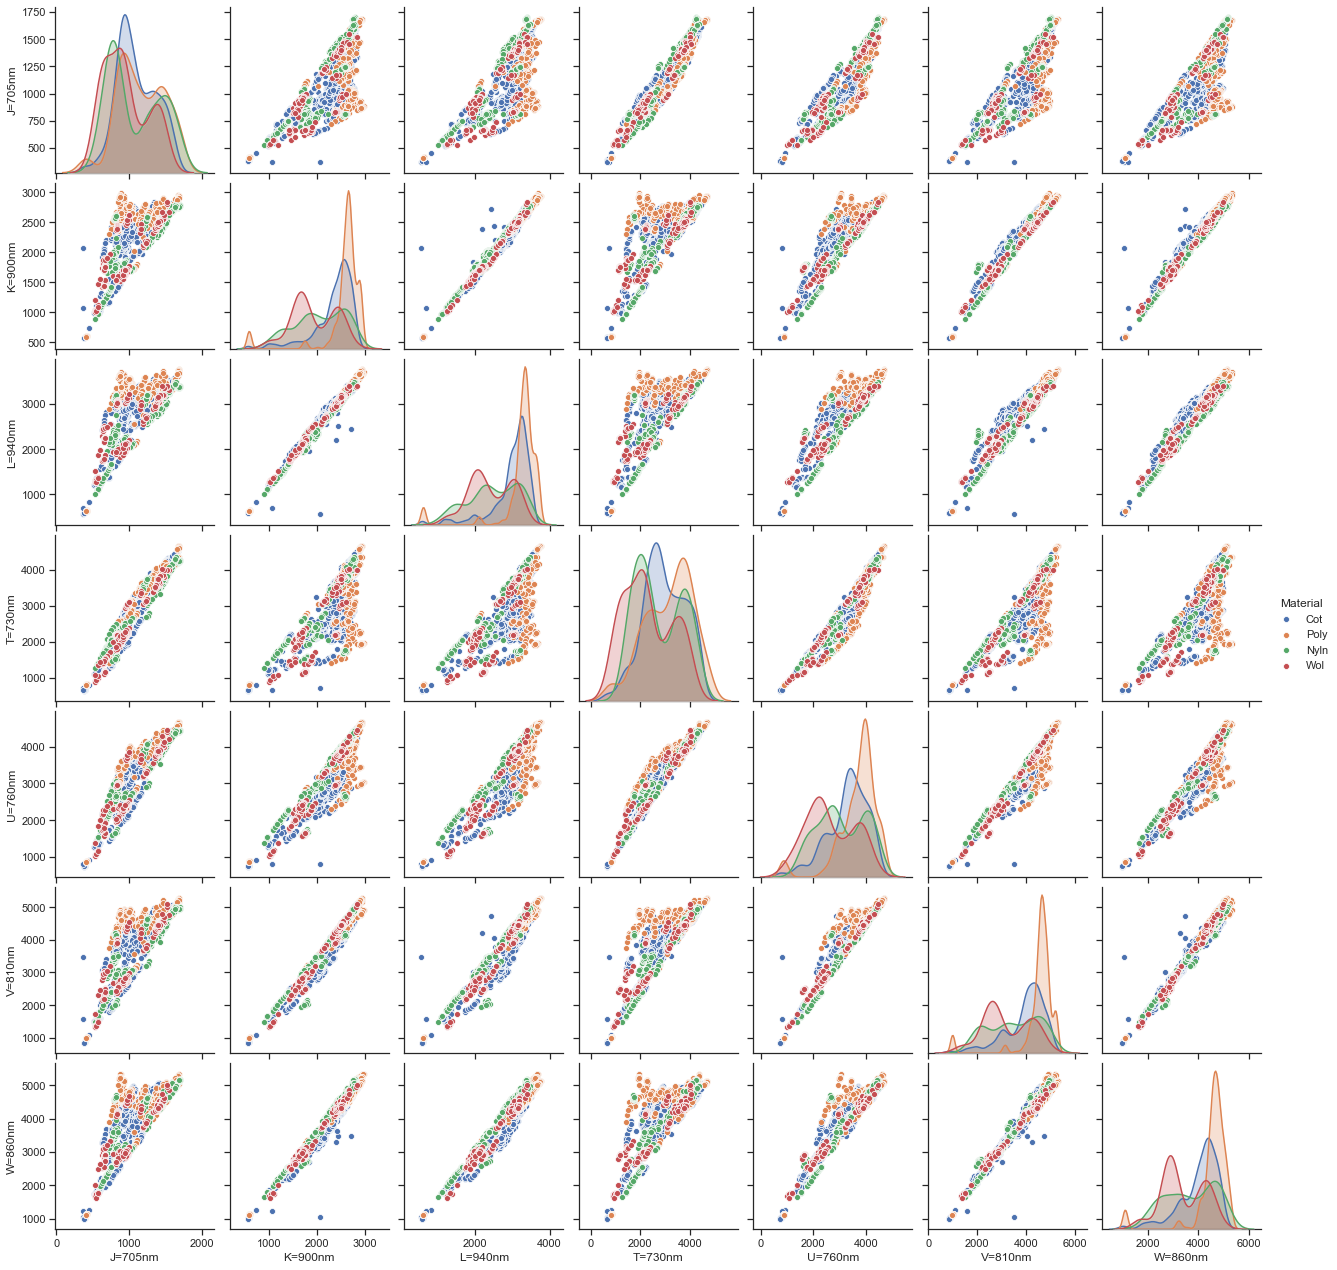

In [12]:
import seaborn as sns
sns.set(style="ticks")
data = df[['Material',
 'J=705nm',
 'K=900nm',
 'L=940nm',
 'T=730nm',
 'U=760nm',
 'V=810nm',
 'W=860nm']]




sns.pairplot(data, hue='Material')






After examining the data it appears that there are no normal distributions related to color or material in each of the variables. Some of these distributions may approach a normal distribution after a much larger sample of data is taken. This is not suprising since many of the factors that influence the readings at each of the wavelenghts are likely to be highly influenced by the dyes and pigments used in the fibers along with other factors such as fiber sources and preparation. This suggests that a non parametric model might be more useful in predicting materials and color. 

In [13]:
#use the already normalized columns for PCA
X_std = df[['A=410nm_std',
                     'B=435nm_std','C=460nm_std',
                     'D=485nm_std','E=510nm_std', 
                     'F=535nm_std','G=560nm_std',
                     'H=585nm_std','R=610nm_std',
                     'I=645nm_std', 'S=680nm_std',
                     'J=705nm_std', 'T=730nm_std',
                     'U=760nm_std','V=810nm_std',
                     'W=860nm_std', 'K=900nm_std', 
                     'L=940nm_std']]


df['Material'] = pd.Categorical(df['Material'])
df['Color'] = pd.Categorical(df['Color'])

#df['code'] = df['Material'].cat.codes


yMat = df['Material'].cat.codes
yCol = df['Color'].cat.codes

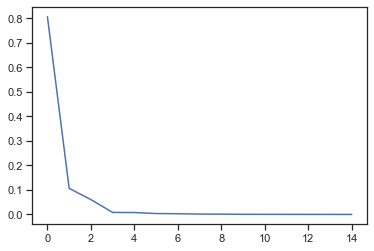

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [8.06539558e-01 1.06427038e-01 6.04954558e-02 8.19000301e-03
 7.74628464e-03 3.69535670e-03 2.82832660e-03 1.47841357e-03
 1.10175834e-03 4.61630610e-04 3.77930675e-04 2.42442969e-04
 1.65994687e-04 1.14317035e-04 5.28464097e-05]


 to retain 80.65% of total variance 1 components required
 to retain 91.3% of total variance 2 components required
 to retain 97.35% of total variance 3 components required
 to retain 98.17% of total variance 4 components required
0.9999173569259071


In [14]:
# Dimensionality reduction 
# conduct principle compenent analysis on the data and examine the explained variance of the components
from sklearn.decomposition import PCA


sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X_std)

pca = sklearn_pca.fit_transform(X_std)

plt.plot(sklearn_pca.explained_variance_ratio_)

plt.show()

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

explained_variance = []
explained_variance = sklearn_pca.explained_variance_ratio_

total_variace = 0
total_variace = 0
components = 0
num_prints = 0
print('\n')
for v in explained_variance:
    total_variace+=v
    components +=1
    
    if total_variace>=0.5 and total_variace<0.7 and num_prints < 1 :
        print(" to retain {}% of total variance  {} components are required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    if total_variace>=0.7 and total_variace<0.8 and num_prints < 2 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.8 and total_variace<0.9 and num_prints < 3 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.9 and num_prints < 4  :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    else:
        None
        
print(sum(explained_variance))


the Principle component analysis shows promising results in that the first three  components account for 97% of the explained vairiance in the data. 

In [15]:
# We just want the first four principal components
pca = PCA(n_components=4)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

for n in range(4):
    df['PC{}'.format(n+1)]= Y_sklearn[:, n]


df.head()


Material Color colorcode  A=410nm  B=435nm  C=460nm  D=485nm  E=510nm  F=535nm  G=560nm  H=585nm  R=610nm  I=645nm  S=680nm  J=705nm  T=730nm  U=760nm  V=810nm  W=860nm  K=900nm  L=940nm  A=410nm_std  B=435nm_std  C=460nm_std  D=485nm_std  E=510nm_std  F=535nm_std  G=560nm_std  H=585nm_std  R=610nm_std  I=645nm_std  S=680nm_std  J=705nm_std  T=730nm_std  U=760nm_std  V=810nm_std  W=860nm_std  K=900nm_std  L=940nm_std       PC1       PC2       PC3       PC4
0      Cot   Blu         b  3192.79  1866.49  3257.94  2069.56  1838.89  1579.59   902.35  1595.24  1254.25   653.96  1185.24  1052.72  3084.72  3712.59  4529.42  4804.92  2672.11  3305.34     0.675674     1.133067     1.182924     1.144312     1.374811     1.454544     1.126850     0.666799    -0.036441    -0.123047    -0.649744    -0.135188     0.201874     0.521319     0.659886     0.902484     0.747025     0.646362 -2.792000 -1.024285 -1.890645  0.013890
1      Cot   Blu         b  3160.60  1844.24  3216.13  2055.37  1818.19  1552.49   882.48  1562.26  1200.41   634.47  1127.68  1021.23  3011.79  3633.51  4468.01  4704.30  2633.01  3268.61     0.617934     1.068459     1.104968     1.106691     1.313089     1.360644     1.028842     0.573463    -0.105456    -0.182807    -0.720525    -0.240345     0.121835     0.427972     0.594549     0.787538     0.665816     0.587825 -2.466722 -1.025317 -1.922318 -0.004770
2      Cot   Blu         b  3223.03  1850.73  3199.77  2071.34  1807.84  1544.15   885.79  1579.33  1246.23   653.31  1144.27  1022.23  3082.15  3630.99  4439.06  4589.65  2601.94  3286.97     0.729915     1.087304     1.074465     1.149031     1.282228     1.331746     1.045168     0.621772    -0.046721    -0.125040    -0.700124    -0.237006     0.199054     0.424997     0.563748     0.656565     0.601284     0.617085 -2.507038 -0.914395 -1.928015 -0.090059
3      Cot   Wht         w  3296.19  2063.88  3482.47  2224.80  1974.94  1712.32  1059.64  1897.92  2297.74  1045.11  2275.85  1394.79  3826.94  4062.57  4656.63  4741.74  2629.80  3269.45     0.861144     1.706230     1.601563     1.555885     1.780474     1.914446     1.902675     1.523415     1.301168     1.076302     0.691353     1.007115     1.016451     0.934440     0.795229     0.830309     0.659149     0.589164 -5.179655  0.824990 -1.284959 -0.005719
4      Cot   Wht         w  3879.54  2222.36  3712.46  2360.52  2086.59  1802.67  1121.73  2030.24  2645.95  1219.56  2988.95  1558.86  4185.61  4381.41  5026.84  5057.62  2808.69  3495.64     1.907507     2.166409     2.030383     1.915707     2.113384     2.227504     2.208931     1.897895     1.747525     1.611203     1.568235     1.555008     1.410086     1.310803     1.189109     1.191163     1.030698     0.949645 -7.121502  1.025419 -1.075970 -0.130870

Text(0, 0.5, 'Component 4')

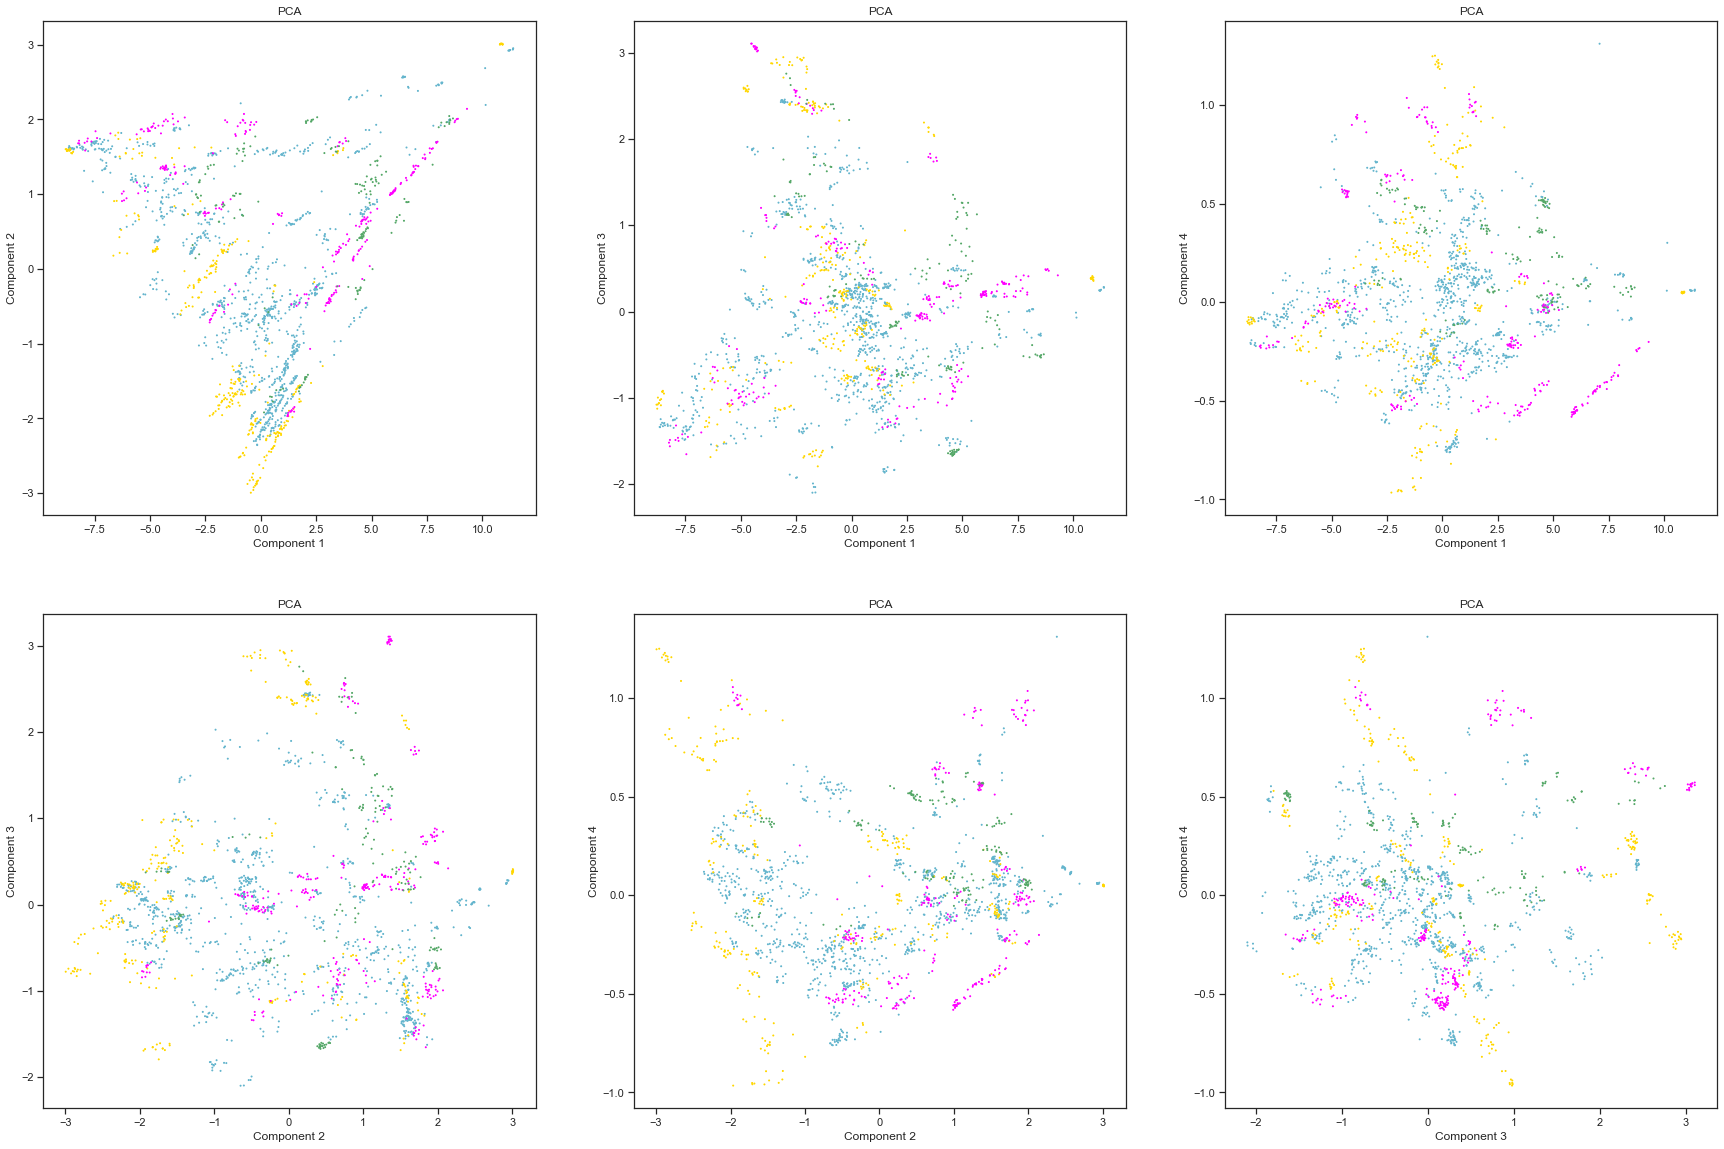

In [19]:

colours = ["c","magenta","gold","g","r","b","k","burlywood","chartreuse"]
mat_color = []
col_color = []

for i in range(0,len(yMat)):
    mat_color.append(colours[yMat[i]])

textile_colour = ['b','w','g','brown','r','m','k','y','grey', 'burlywood','orange']
for i in range(0,len(yCol)):
    col_color.append(textile_colour[yCol[i]])
        
    yCol

#plot the first two results of each reduction technique
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plt.title('PCA')
plt.scatter(pca_components[:, 0],  pca_components[:, 1],
             color=mat_color,
             s=1, alpha = 1,  cmap='cool')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(2,3,2)
plt.title('PCA')
plt.scatter(pca_components[:, 0],  pca_components[:, 2],
             c=mat_color,
            s=1, alpha = 1,  cmap='cool')
plt.xlabel('Component 1')
plt.ylabel('Component 3')

plt.subplot(2,3,3)
plt.title('PCA')
plt.scatter(pca_components[:, 0],  pca_components[:, 3],
            c=mat_color,
             s=1,alpha = 1,   cmap='cool')
plt.xlabel('Component 1')
plt.ylabel('Component 4')

plt.subplot(2,3,4)
plt.title('PCA')
plt.scatter(pca_components[:, 1],  pca_components[:, 2],
             c=mat_color,
             s=1,alpha = 1,   cmap='cool')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.subplot(2,3,5)
plt.title('PCA')
plt.scatter(pca_components[:, 1],  pca_components[:, 3],
             c=mat_color,
             s=1,alpha = 1,   cmap='cool')
plt.xlabel('Component 2')
plt.ylabel('Component 4')

plt.subplot(2,3,6)
plt.title('PCA')
plt.scatter(pca_components[:,2],  pca_components[:, 3],
             c=mat_color,
             s=1,alpha = 1,   cmap='cool')
plt.xlabel('Component 3')
plt.ylabel('Component 4')


It appears that the materials do not cluster or delineate in any specific way, in the principle components.  

In [13]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Predicting Color Using Supervised Learning 

In [14]:
rfc = ensemble.RandomForestClassifier()

## Set Features 
X = df[['PC1','PC2','PC3','PC4']]

y = df['Color']


In [15]:
#split Data into train and test sets

from sklearn.model_selection import train_test_split

#I_train, I_test, J_train, J_test = train_test_split(I, J, test_size=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Synthetic Data

In [16]:
#Random Over sample and SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

X_smoted, y_smoted = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_smoted).items()))
#[(0, 4674), (1, 4674), (2, 4674)]


print(sorted(Counter(y_smoted).items()))
print(sorted(Counter(X_train).items()))


[('Blk', 381), ('Blu', 381), ('Brn', 381), ('Grn', 381), ('Gry', 381), ('Org', 381), ('Pur', 381), ('Red', 381), ('Tan', 381), ('Wht', 381), ('Yel', 381)]
[('Blk', 381), ('Blu', 381), ('Brn', 381), ('Grn', 381), ('Gry', 381), ('Org', 381), ('Pur', 381), ('Red', 381), ('Tan', 381), ('Wht', 381), ('Yel', 381)]
[('PC1', 1), ('PC2', 1), ('PC3', 1), ('PC4', 1)]


In [23]:
# Grid search Decision trees to prdict color
from sklearn.tree import DecisionTreeClassifier

param_grid = {    'criterion': ['entropy','gini'],
    'splitter':['best', 'random'],
    'max_features':np.arange(1,5),
    'max_depth': np.arange(3, 10),}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score = True)

tree.fit(X_smoted, y_smoted)

print(tree.best_estimator_)


NameError: name 'GridSearchCV' is not defined

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
1
​

In [ ]:
#Random Forrest GRid Search 
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [100,200,500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf = rfc()
rf_random = GridSearchCV(rf, param_grid)#  cv = 3, random_state=42, n_jobs = -1,return_train_score = True)
rf_random.fit(X_smoted, y_smoted)
print(rf_random.best_estimator_)



randome forrest
(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False

In [28]:
#Grid search on support vector machines 

from sklearn.svm import SVC
clf = GridSearchCV(SVC(gamma = 'auto'),{
    'C': [1,5,10],
    'kernel':['rbf','linear'],
    'cache_size':[100,200,300],
})#, cv=5,return_train_score = True)
clf.fit(X_smoted, y_smoted)
print(clf.best_estimator_)



SVC(C=10, break_ties=False, cache_size=100, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


    SVC(C=10, break_ties=False, cache_size=100, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
1
​

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {'learning_rate': [0.1,0.15,0.2],
               'max_depth': [10,50,100],
               'n_estimators': [50,100,200], 
               'loss':['deviance'],
               'subsample':[1,0.7,0.5],
               'min_samples_split': [2, 5]}

#boost = GradientBoostingClassifier()






grid_boost = GridSearchCV(GradientBoostingClassifier(), param_grid)#  cv = 3, random_state=42, n_jobs = -1,return_train_score = True)
grid_boost.fit(X_smoted, y_smoted)
print(grid_boost.best_estimator_)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


    GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

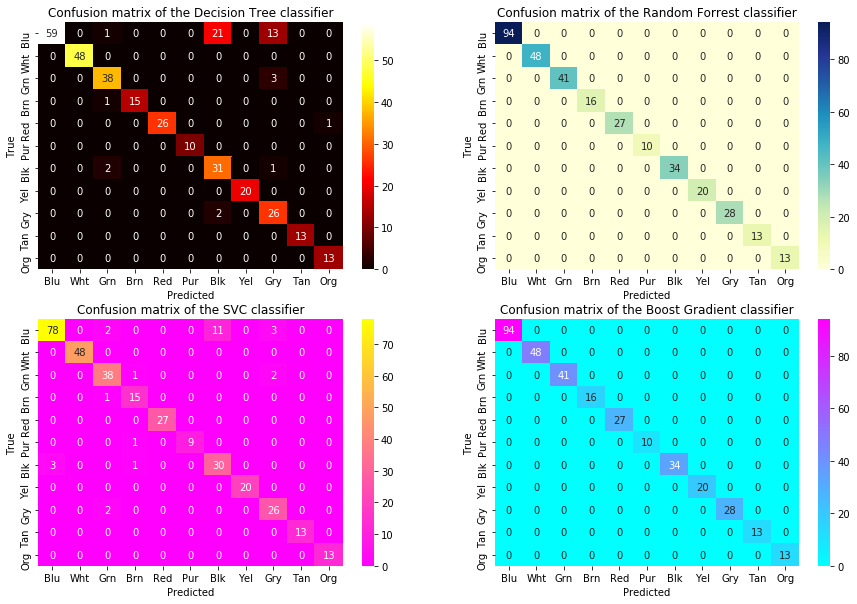

In [17]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier



Tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree.fit(X_smoted, y_smoted)
Tree_pred=Tree.predict(X_test)

Forrest = rfc(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Forrest.fit(X_smoted, y_smoted)
Forrest_pred=Forrest.predict(X_test)

SupVecClas = SVC(C=10, break_ties=False, cache_size=100, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SupVecClas.fit(X_smoted, y_smoted)
SVC_pred=SupVecClas.predict(X_test) 

boost = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
boost.fit(X_smoted, y_smoted)
Boost_pred=boost.predict(X_test) 

from sklearn.metrics import confusion_matrix
labels = ['Blu', 'Wht', 'Grn', 'Brn', 'Red', 'Pur', 'Blk', 'Yel', 'Gry',
       'Tan', 'Org']

#draw heatmap
fig = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
cm = confusion_matrix(y_test, Tree_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="hot")
plt.title('Confusion matrix of the Decision Tree classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,2)
cm = confusion_matrix(y_test, Forrest_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")
plt.title('Confusion matrix of the Random Forrest classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,3)
cm = confusion_matrix(y_test, SVC_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="spring")
plt.title('Confusion matrix of the SVC classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,4)
cm = confusion_matrix(y_test, Boost_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="cool")
plt.title('Confusion matrix of the Boost Gradient classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [99]:
def specif__sensi(confusion_matrix, lables):
    for i,color in enumerate(labels):
        F_neg = sum(cm[i,0:i])+sum(cm[i,i+1:len(labels)])
        T_pos = cm[i,i]
        T_neg = sum(map(sum,cm[0:i,0:i]))+sum(map(sum,cm[0:i,i+1:len(labels)]))+sum(map(sum,cm[i+1:len(labels),0:i]))+sum(map(sum,cm[i+1:len(labels),i+1:len(labels)]))
        F_pos = sum(cm[0:i,i])+sum(cm[i+1:len(labels),i])

        sensitivity = (T_pos)/(T_pos+F_neg)
        specificity = (T_neg)/(T_neg+F_pos)
        
        print('for {}'.format(color))
        print('the sensitivity is {}'.format(sensitivity))
        print( 'the specificity is {}'.format(specificity))
        #return()

In [100]:
specif__sensi(cm, labels)

for Blu
the sensitivity is 1.0
the specificity is 1.0
for Wht
the sensitivity is 1.0
the specificity is 1.0
for Grn
the sensitivity is 1.0
the specificity is 1.0
for Brn
the sensitivity is 1.0
the specificity is 1.0
for Red
the sensitivity is 1.0
the specificity is 1.0
for Pur
the sensitivity is 1.0
the specificity is 1.0
for Blk
the sensitivity is 1.0
the specificity is 1.0
for Yel
the sensitivity is 1.0
the specificity is 1.0
for Gry
the sensitivity is 1.0
the specificity is 1.0
for Tan
the sensitivity is 1.0
the specificity is 1.0
for Org
the sensitivity is 1.0
the specificity is 1.0


In [72]:
cm[1,0:3]

array([ 0, 48,  0])

In [96]:
print(cm[0:3,1:11]  )

[[ 0  0  0  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]]


In [98]:
for i,color in enumerate(labels):
    
    F_neg = sum(cm[i,0:i])+sum(cm[i,i+1:len(labels)])
    T_pos = cm[i,i]
    T_neg = sum(map(sum,cm[0:i,0:i]))+sum(map(sum,cm[0:i,i+1:len(labels)]))+sum(map(sum,cm[i+1:len(labels),0:i]))+sum(map(sum,cm[i+1:len(labels),i+1:len(labels)]))
    F_pos = sum(cm[0:i,i])+sum(cm[i+1:len(labels),i])
    
    #specificity = (sum(cm[0:i,i])+sum(cm[i+1:len(labels),i]))+sum(sum(cm[0:i,0:i]+ cm[0:i,i+1:len(labels)]+cm[i+1:len(labels),0:i]+cm[i+1:len(labels),i+1:len(labels)]))
    
    #specificity
    
    print(F_neg,
    F_pos,
    T_pos,
    T_neg)
    
    #should print one for each 

0 0 94 250
0 0 48 296
0 0 41 303
0 0 16 328
0 0 27 317
0 0 10 334
0 0 34 310
0 0 20 324
0 0 28 316
0 0 13 331
0 0 13 331


In [69]:
cm[0,0]
labels = ['Blu', 'Wht', 'Grn', 'Brn', 'Red', 'Pur', 'Blk', 'Yel', 'Gry','Tan', 'Org']
for i,color in enumerate(labels):
    sensitivity = cm[i,i]/sum(cm[i])
    specificity = (sum(cm[0:i,i])+sum(cm[i+1:len(labels),i])) / (sum(cm[i,0:i]))+sum(cm[i,i+1:len(labels)])
    
    
    print('for {}'.format(color))
    print('the sensitivity is {}'.format(sensitivity))
    print( 'the specificity is {}'.format(specificity))
    

for Blu
the sensitivity is 1.0
the specificity is [nan inf inf inf inf inf inf inf inf inf inf]
for Wht
the sensitivity is 1.0
the specificity is [inf nan inf inf inf inf inf inf inf inf inf]
for Grn
the sensitivity is 1.0
the specificity is [inf inf nan inf inf inf inf inf inf inf inf]
for Brn
the sensitivity is 1.0
the specificity is [inf inf inf nan inf inf inf inf inf inf inf]
for Red
the sensitivity is 1.0
the specificity is [inf inf inf inf nan inf inf inf inf inf inf]
for Pur
the sensitivity is 1.0
the specificity is [inf inf inf inf inf nan inf inf inf inf inf]
for Blk
the sensitivity is 1.0
the specificity is [inf inf inf inf inf inf nan inf inf inf inf]
for Yel
the sensitivity is 1.0
the specificity is [inf inf inf inf inf inf inf nan inf inf inf]
for Gry
the sensitivity is 1.0
the specificity is [inf inf inf inf inf inf inf inf nan inf inf]
for Tan
the sensitivity is 1.0
the specificity is [inf inf inf inf inf inf inf inf inf nan inf]
for Org
the sensitivity is 1.0
the speci

In [ ]:
sensitivity = True Positives/(true positives + false negatives)
for cotton would be 190/(190+(3+3+2))
the true positives divided by summation of all in that row


specificity = True negatives/(False Positives + True negatives) 
for cotton would be 2+2/(54+54+36+?(2))

# Material Identification

In [103]:
#set features 

I = df[['PC1','PC2','PC3','PC4']]
J = df['Material']


In [104]:
#train test split
from sklearn.model_selection import train_test_split

I_train, I_test, J_train, J_test = train_test_split(I, J, test_size=0.2, random_state=42)
print(sorted(Counter(J_train).items()))


[('Cot', 780), ('Nyln', 209), ('Poly', 250), ('Wol', 133)]


In [105]:
#create synthetic data to account for class imbalence 
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

I_smoted, J_smoted = SMOTE().fit_resample(I_train, J_train)

print(sorted(Counter(J_train).items()))
print(sorted(Counter(J_smoted).items()))


[('Cot', 780), ('Nyln', 209), ('Poly', 250), ('Wol', 133)]
[('Cot', 780), ('Nyln', 780), ('Poly', 780), ('Wol', 780)]


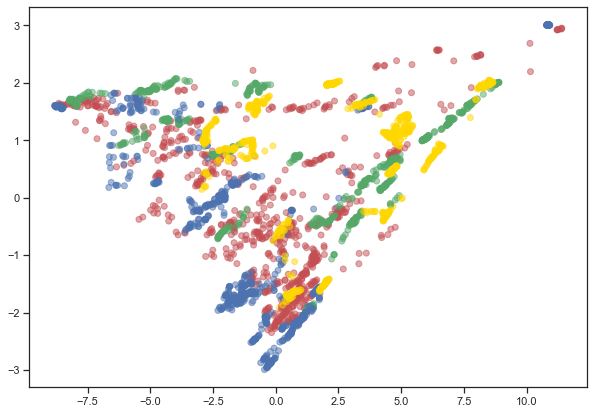

In [306]:
#random over sample 
import matplotlib.pyplot as plt
colors={'Cot':'r','Nyln':'g','Poly':'b','Wol':'gold'}
y_colors = []
for sample in y_smoted:
    y_colors.append(colors[sample])
#X_resampled.scatter()#color = y_resampled)
plt.figure(figsize=(10,7))
plt.scatter(X_smoted[:,0],X_smoted[:,1], color = y_colors, alpha = .5)
plt.show()

In [297]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {    'criterion': ['entropy','gini'],
    'splitter':['best', 'random'],
    'max_features':np.arange(1,5),
    'max_depth': np.arange(3, 10),}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score = True)

tree.fit(I_smoted, J_smoted)

tree_preds = tree.predict_proba(I_test)[:, 1]
#tree_performance = score(tree)
print(tree.best_estimator_)

#print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#Random Forrest GRid Search 
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [100,200,500,1000],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,50,100,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf = rfc()
rf_random = GridSearchCV(rf, param_grid)#  cv = 3, random_state=42, n_jobs = -1,return_train_score = True)
rf_random.fit(I_smoted, J_smoted)
print(rf_random.best_estimator_)



In [300]:
#Grid search on support vector machines 

from sklearn.svm import SVC
clf = GridSearchCV(SVC(gamma = 'auto'),{
    'C': [1,5,10],
    'kernel':['rbf','linear'],
    'class_weight': ['balanced'],
    'cache_size':[100,200,300],
    'decision_function_shape':['ovr','ovo']
})#, cv=5,return_train_score = True)
clf.fit(I_smoted, J_smoted)
print(clf.best_estimator_)



SVC(C=10, break_ties=False, cache_size=100, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [311]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {'learning_rate': [0.1,0.15,0.2],
               'max_depth': [10,50,100],
               'n_estimators': [50,100,200], 
               'loss':['deviance'],
               'subsample':[1,0.7,0.5],
               'min_samples_split': [2, 5]}

#boost = GradientBoostingClassifier()






grid_boost = GridSearchCV(GradientBoostingClassifier(), param_grid)#  cv = 3, random_state=42, n_jobs = -1,return_train_score = True)
grid_boost.fit(I_smoted, J_smoted)
print(grid_boost.best_estimator_)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=100,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


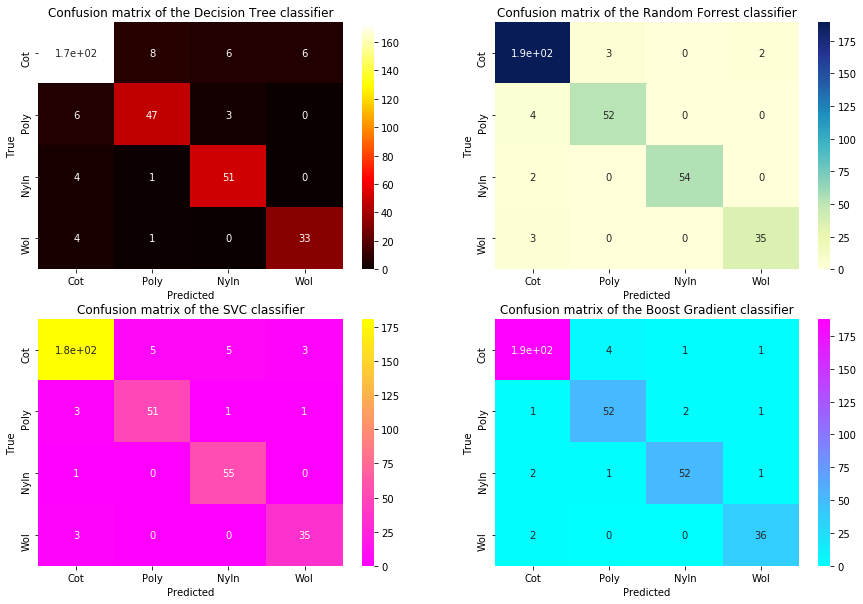

In [106]:
Tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree.fit(I_smoted, J_smoted)
Tree_pred=Tree.predict(I_test)

Forrest = rfc(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Forrest.fit(I_smoted, J_smoted)
Forrest_pred=Forrest.predict(I_test)

SupVecClas = SVC(C=10, break_ties=False, cache_size=100, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SupVecClas.fit(I_smoted, J_smoted)
SVC_pred=SupVecClas.predict(I_test) 

boost = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=100,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
boost.fit(I_smoted, J_smoted)
Boost_pred=boost.predict(I_test) 

from sklearn.metrics import confusion_matrix
labels = ['Cot', 'Poly', 'Nyln', 'Wol']

#draw heatmap
fig = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
cm = confusion_matrix(J_test, Tree_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="hot")
plt.title('Confusion matrix of the Decision Tree classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,2)
cm = confusion_matrix(J_test, Forrest_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")
plt.title('Confusion matrix of the Random Forrest classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,3)
cm = confusion_matrix(J_test, SVC_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="spring")
plt.title('Confusion matrix of the SVC classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2,2,4)
cm = confusion_matrix(J_test, Boost_pred, labels)
sns.heatmap(cm,annot=True, xticklabels=labels, yticklabels=labels,cmap="cool")
plt.title('Confusion matrix of the Boost Gradient classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [107]:
#print sensitivity and specificity for the Boost GRadient Model 
specif__sensi(cm, labels)

for Cot
the sensitivity is 0.9690721649484536
the specificity is 0.9666666666666667
for Poly
the sensitivity is 0.9285714285714286
the specificity is 0.9826388888888888
for Nyln
the sensitivity is 0.9285714285714286
the specificity is 0.9895833333333334
for Wol
the sensitivity is 0.9473684210526315
the specificity is 0.9901960784313726


The current spectral data combined with the gradient boosting model shows relative success, However, I would like to stress caution as this model may be overfit due to the small sample size of the data. This can be corrected in the future with continued sampling of garments. 


## Conclusions

The current spectral data combined with 'random forrest and gradient boosting' classifier models show a high level of success for predicting color and material. The random Forrest model appears to have some difficulty with identifying and mis identifying cotton. In the Gradient Boosting Classifier Specificity for each of the catagories is in the high ninetieth percentile, and the the sensitivity is above 90% for each of the catagories. However, It is important to note that these models may be overfit specifically for material data due to the small sample size of the data. This can be corrected in the future with continued sampeling of textiles. 

## Future Avenues of Research and Experimentation

There are several avenues of future research that might clarify and provide a higher quality of sample data.  
The first avenue would be to conduct unsupervised learning on the data which could provide clarification in regards to color groups. In the data above, colors were approximate observed colors. However these labels did not take into account the complexity and subtlty of the many hues used by the fashion industry. For example would maroon fall under red or brown,and where would olive drab fall categorically? For the majority of textiles, color can be quite ambiguous, often clothing contains many pigments and dyes to create a more neutral hue.  Unsupervised learning might provide a way to differentiate color in a more objective fashion and with the proper spectral data might be able to differentiate between dyes used. 
Collection of more data would be of use and make it easier to statistically differentiate the effects of material on spectral readings from pigments and dyes. A greater number of readings would also help aviod class imbalance and prevent the data from overfitting.  
Construction of an improved spectrometer that can read a larger number of points on the spectra and farther into the infrared spectrum would provide a finer level of granularity to the data. Being able to collect data that is farther into the infrared would provide more clarity and insight into the material composition of the fibers. In addition if a larger number of variables could be derived from this sort of spectral data, a support vector classifier might be of more use than the random forrest or boost gradient classifiers above. 
Finally by taking recordings from a large number of blended fibers, it may be possible to create a regression model to predict the percentage composition of various textiles. 
